# An Analysis of Internal Displacement in Selected States in North West and Central Zones of Nigeria
In recent years, Nigeria has seen a surge in the number of internally displaced persons especially in the northern part of the country. While the affected population have one thing in common - being internally displaced and vulnerable, they may have dissimilar characteristics in terms of demographic and geographic distribution and very importantly reasons for their placement. I believe that a better understanding of these is necessary for all stakeholders involved in delivering humanitarian services to the Internally Displaced Persons (IDPs) and most importantly to all the tiers of the national government.


Having set the general context of this discourse, the specific context is the North West and North Central zones of Nigeria. 

## Objective

The objective of this analysis is to glean some insight about the IDPs in the North West and North Central zones of Nigeria by asking some specific questions and seeking answers using a dataset collected by the United Nations International Organisation for Migration (IOM).

Nigeria consists of six(6) geopolitical zones. The scope of this analysis is limited to the two zones mentioned earlier as those were the only zones covered in the dataset provided.


## Dataset Description 
####  Title:
Nigeria Displacement Data - North Central & West Zones - Location Assessment 

#### Publisher: 
International Organisation for Migration (IOM) 
The dataset cover the period of 4 September - 16 October 2019 and includes the states mostly affected by displacement including Benue,Nasarawa and Plateau in North Central;  Kaduna, Kano, Katsina, Sokoto and Zamfara in North West as shown below:

In [4]:
# !pip install -U seaborn

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid")


df_assessments = pd.read_excel('idp_data_2.xlsx', sheet_name='location_assessments')
df_zones = pd.read_excel('idp_data_2.xlsx', sheet_name='zones')

# IDPs distributions
idps_per_state = df_assessments.groupby('State').sum()[['Number of Individuals']].reset_index()
idps_per_state['idp_%'] = idps_per_state['Number of Individuals']/sum(idps_per_state['Number of Individuals']) * 100

df_zones['State'] = [state.upper() for state in df_zones['State']]
idps_per_state = pd.merge(idps_per_state, df_zones, how='inner', on='State')

idps_per_zone = idps_per_state.groupby('Zones').sum()[['idp_%']].reset_index()


### IDPs Distribution
In the IDPs dataset provided, a total of eight(8) states distributed into two geopolitical zones(North Central and North West) were reported.

# A. Qestion 1:  
######  a. What is the population of the reported IDPs ? 
From the dataset, a total of 445,901 persons were reported to be internal displaced.

###### b. Is the size of  the population significantly different between the zones?
North Central: ~ 53%, North West: ~ 47%. There exist only a minimal difference of 6% between the IDPs population present in both zones (North Central is more by only 6%). 

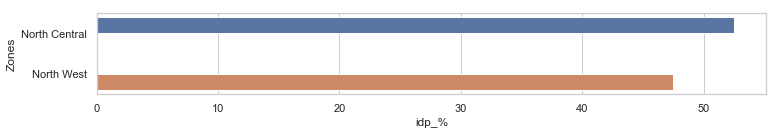

In [5]:
fig1, axs1 = plt.subplots(ncols=1, figsize=(12,1.5))

ax1 = sns.barplot(x="idp_%", y="Zones", data=idps_per_zone.sort_values(['idp_%'], ascending=False), hue='Zones')
ax1.legend_.remove()


Though there is no wide difference in the number of IDPs between both zones, this is not the case at individual state levels in the zones.

The top two states (BENUE and PLATEAU) are in North Central. Benuw and Plateau together have 47% of the total IDPs in the entire North Central and North West.

Also, NASARAWA has the list number of IDPs and its also in North Central. Hence the North Central showed the highest range in IDPs.

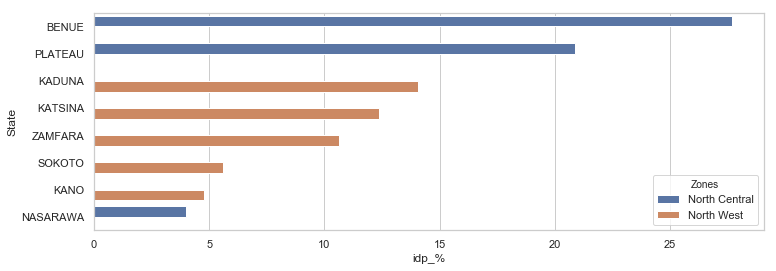

In [3]:
fig2, axs2 = plt.subplots(ncols=1, figsize=(12,4))
ax1 = sns.barplot(x="idp_%", y="State", data=idps_per_state.sort_values(['idp_%'], ascending=False), hue='Zones')

# B. Question 2:
IDPs are vulnerable groups in society who need the intervention of government and assistance from humanitarian NGOs and general members of the society to survive. When IDPs are clustered centralised approach to social service delivery may work best. However, when IDPs are geographically disparsed, then applying distributed solution delivery may be better than the traditional central approach.






#### Question: Are the IDP sites in each state clustered within few Local Government Areas (LGAs) or are they all over most of the LGAs?

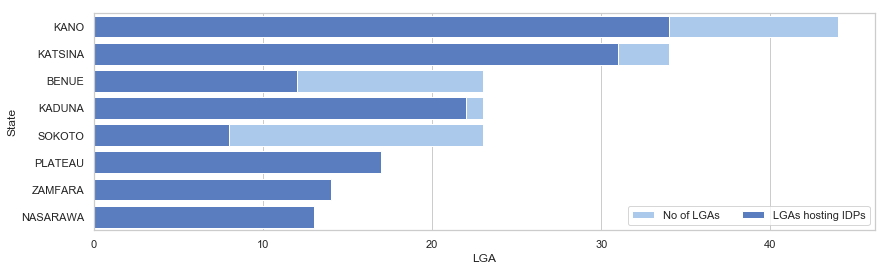

In [3]:
df_merged = pd.merge(df_zones, df_assessments, how='inner', on='State')

df_merged_ = df_merged.groupby(['Zones', 'State', 'No of LGA']).agg({'LGA': pd.Series.nunique}).reset_index()
df_merged_['% of LGAs IDPs Presence'] = df_merged_['LGA']/df_merged_['No of LGA'] * 100
df_merged_ = df_merged_.sort_values(['No of LGA'], ascending=False)


df_geo_dist = df_assessments.groupby(['State', 'LGA']).agg({'Longitude': 'mean', 
                                              'Latitude': 'mean', 
                                              'Number of Individuals': 'sum', 
                                              'Number of Households': 'sum'}).reset_index()

# Show the number of LGAs hosting IDPs per state
fig3, axs3 = plt.subplots(ncols=1, figsize=(14, 4))

# Plot the total number of LGAs per state
sns.set_color_codes('pastel')
sns.barplot(x='No of LGA', y='State', data=df_merged_, label='No of LGAs', color='b')

# Plot the number of LGAs hosting IDPs per state
sns.set_color_codes('muted')
sns.barplot(x='LGA', y='State', data=df_merged_, label='LGAs hosting IDPs', color='b')

# legends
_ = axs3.legend(ncol=2, loc='lower right', frameon=True)

Here is what was observed:
1. The data suggests that the IDP sites are all over most of the LGAs in the hosting states. 
2. More precisely, IDP sites are present in more than 60% of the LGAs per state. 
3. Worthy of note is that in Plateau, Zamfara and Nasarawa state, IDPs are present in all of the LGAs.
4. Kano and Katsina are the only reported states with over 30 LGAs. Also, over 30 LGAs in both states have IDPs population.



# C. Question 3: 
#### What is the gender distribution in the IDPs across the states?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


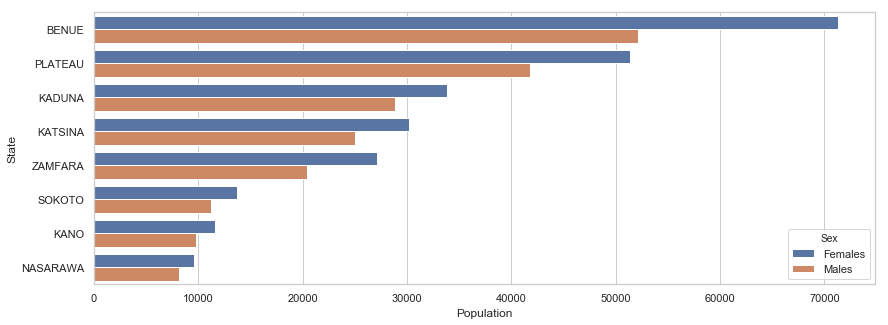

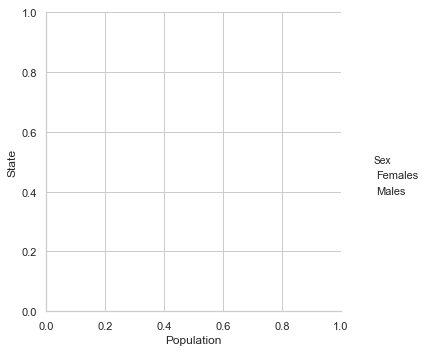

In [5]:
import re

regexp = re.compile(r'State|Boys|Girls|Men|Women|Elderly')
df_assessments[[col for col in df_assessments.columns if (regexp.search(col))]]

df_assessments['Females'] = (df_assessments['Girls (<1)']+df_assessments['Girls (1 - 5 y)']
                             +df_assessments['Girls (6 - 17 y)']+ df_assessments['Women (18 - 59 y)'] 
                             + df_assessments['(Elderly women 60+ y)'])


df_assessments['Males'] = (df_assessments['Boys (<1)']+df_assessments['Boys (1 - 5 y)']
                             +df_assessments['Boys (6 - 17 y)']+ df_assessments['Men (18 - 59 y)'] 
                             + df_assessments['(Elderly men 60+ y)'])

df_assessments['Male_Children_&_Elders'] = (df_assessments['Boys (<1)']+df_assessments['Boys (1 - 5 y)']
                             +df_assessments['Boys (6 - 17 y)']+ df_assessments['(Elderly men 60+ y)'])



df_assessments['Female_Children_&_Elders'] = (df_assessments['Girls (<1)']+df_assessments['Girls (1 - 5 y)']
                             +df_assessments['Girls (6 - 17 y)']+ df_assessments['(Elderly women 60+ y)'])

df_gender = df_assessments.groupby(['State']).agg({'Males': 'sum',                                                   
                                                   'Male_Children_&_Elders': 'sum',
                                                   'Men (18 - 59 y)': 'sum',
                                                   'Females': 'sum', 
                                                   'Women (18 - 59 y)': 'sum',
                                                   'Female_Children_&_Elders': 'sum',
                                                  }).reset_index()



df_sex = pd.melt(df_gender.groupby(['State']).agg({'Males': 'sum', 'Females': 'sum'}).reset_index(),
        id_vars=['State'], var_name='Sex', value_name='Population')

fig4, axs4 = plt.subplots(ncols=1, figsize=(14, 5))
_ = sns.factorplot(
    y='State', 
    x='Population', 
    hue='Sex', 
    data= df_sex.sort_values(['Population', 'Sex'], ascending=False), 
    kind='bar', ax=axs4)



From the chart above, the data suggests that there are more females internally displaced persons in all the states across the zones. This disparity is most prominent in Benue state.

In [6]:
pd.merge(df_sex, df_sex.groupby(['State']).sum().reset_index(), how='inner', on='State')

df_sex_perc = df_assessments.groupby(['State']).sum()[['Males', 'Females']]
df_sex_perc['Sex_%_Diff'] = round((
    (df_sex_perc['Females'] - df_sex_perc['Males'])/(df_sex_perc['Females'] + df_sex_perc['Males'])) *100, 2)


df_sex_perc = (df_sex_perc.groupby(['State'])
               .sum()[['Males', 'Females','Sex_%_Diff']]
               .reset_index().sort_values(['Sex_%_Diff'], ascending=False)
              )

df_sex_perc.style.bar(subset=['Sex_%_Diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,State,Males,Females,Sex_%_Diff
0,BENUE,52111,71308,15.55
7,ZAMFARA,20388,27083,14.1
5,PLATEAU,41771,51341,10.28
6,SOKOTO,11173,13734,10.28
3,KATSINA,25027,30154,9.29
2,KANO,9796,11569,8.3
4,NASARAWA,8153,9572,8.01
1,KADUNA,28900,33821,7.85


A closer look as shown in the table above revealed that there is an average of ~9% (with 2.6% Std) more female IDPs in all the states in both zones.

In [7]:
df_sex_lga = df_assessments.groupby(['State', 'LGA']).sum()[['Males', 'Females']].reset_index()

df_sex_lga['Sex_%_Diff'] = round((
    (df_sex_lga['Females'] - df_sex_lga['Males'])/(df_sex_lga['Females'] + df_sex_lga['Males'])) *100, 2)

df_sex_lga['Sex Catig'] = ['More Females LGAs' if val > 0 else 'More Males LGAs' for val in df_sex_lga['Sex_%_Diff'] ]
df_sex_lga = df_sex_lga.sort_values(['Sex_%_Diff']).reset_index()

20.56737588652482

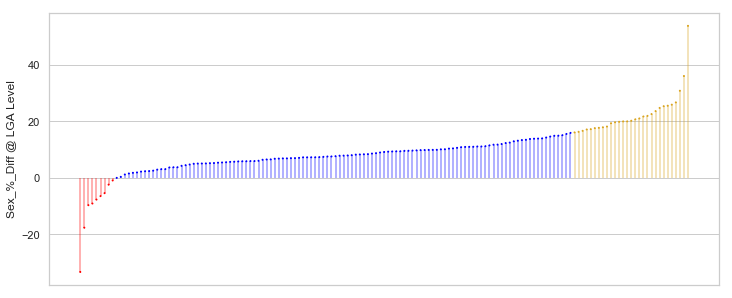

In [8]:
# plt.xlabel('Value of the variable')

#df_sex_lga = df_sex_lga.sort_values(['Sex_pct_Diff']).reset_index()
catig_colour= np.array(["red" if val<0 else "blue" if val<16 else "goldenrod" for val in df_sex_lga['Sex_%_Diff']])
#np.where(df_sex_lga['Sex_%_Diff']>0, 'blue', 'red')

fig6, axs6 = plt.subplots(ncols=1, figsize=(12,5))
_ = plt.vlines(x=np.array(list(df_sex_lga.index))+1, ymin=0, ymax=df_sex_lga['Sex_%_Diff'], color=catig_colour, alpha=0.4)
_ = plt.scatter(np.array(list(df_sex_lga.index))+1, df_sex_lga['Sex_%_Diff'], color=catig_colour, s=1, alpha=1)
plt.ylabel('Sex_%_Diff @ LGA Level')
axs6.axes.get_xaxis().set_visible(False)

# More males:~6%, Females above the max state level female IDPs ~19%
len(df_sex_lga[df_sex_lga['Sex_%_Diff'] > 16])/len(df_sex_lga[df_sex_lga['Sex_%_Diff'] > 0]) *100



#df_sex_lga[df_sex_lga['Sex_%_Diff'] > 16].groupby(['State','LGA']).mean().sort_values(['Females'], ascending=False)

#### One follow-up question is: does this trend(more female IDPs) hold at LGA level?
The chart above shows that it does hold: 93% of the LGAs has more female IDPs than males. About 21% of the 93% has females making up more than 16% of their IDPs population (this is more than the maximum percentage difference seen at the state level).

# Question 4: 
#### What should the state and LGAs focus on to stop or reduce the chances of people being displaced?

In [15]:
def pieplot(data, category):
    """
    Description: This is a helper function for ploting a pie chart. It wraps matplotlib pie chart function
    to make it easy to create more than one pie chart without mannually redefining a whole new matplotlib 
    figures, axis etc.

    Arguments:
        data: an array of constituent numeric ratios to be ploted. 
        category: an array of strings and same size with data. Each element 
                  is the label of the corresponding ratio in data. 

    Returns:
        None
    """
    
    # Plot the distribution of the reasons for displacement
    fig7, ax7 = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%".format(pct, absolute)


    wedges, texts, autotexts = ax7.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))


    ax7.legend(wedges, category,
              title="Reason",
              loc="center right",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=11, weight="bold")
    ax7.set_title("Reason for displacement of Majority")
    plt.show()
    
    return 



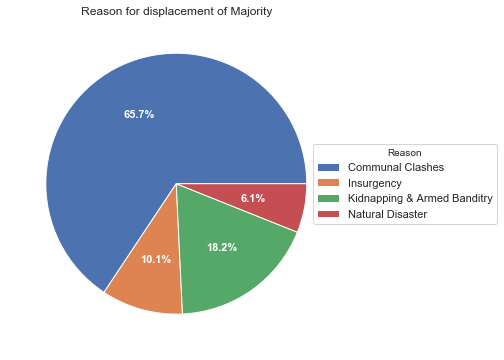

In [17]:

df_reason = df_assessments.groupby(['Reason for displacement of Majority']).sum()[['Number of Individuals']].reset_index()

df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))
    

In North Cnetral and North West combined, ~66% of the IDPs were displaced due to communal clashes. 

But is this trend same at the individual LGA levels?

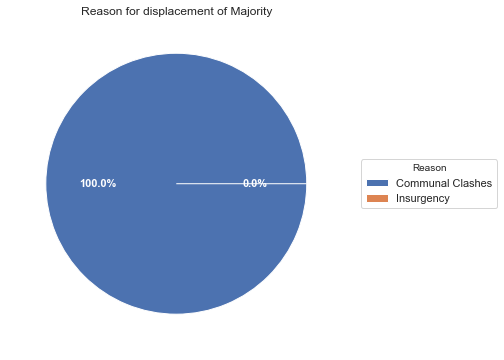

In [33]:
# df_reason = df_assessments.groupby(['Reason for displacement of Majority']).sum()[['Number of Individuals']].reset_index()

# df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

# pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

'''
['BENUE',
 'KADUNA',
 'KANO',
 'KATSINA',
 'NASARAWA',
 'PLATEAU',
 'SOKOTO',
 'ZAMFARA']
'''
df_temp = df_assessments[df_assessments['State'] == 'BENUE']
df_reason = df_temp.groupby(['Reason for displacement of Majority in BENUE']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

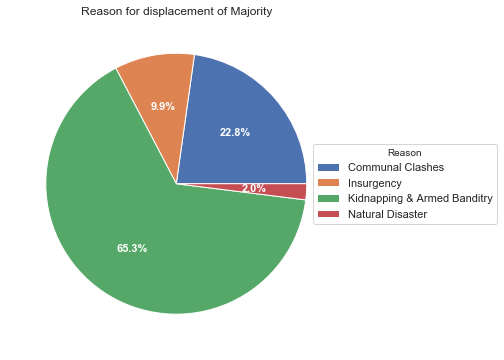

In [34]:
df_temp = df_assessments[df_assessments['State'] == 'ZAMFARA']
df_reason = df_temp.groupby(['Reason for displacement of Majority in ZAMFARA']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

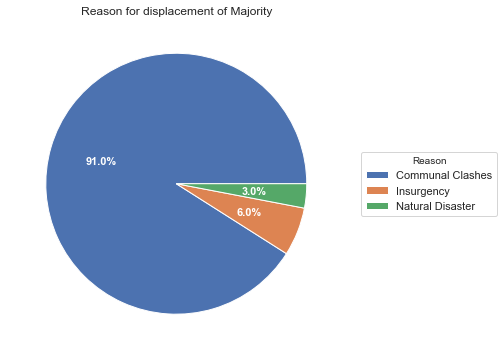

In [35]:
df_temp = df_assessments[df_assessments['State'] == 'PLATEAU']
df_reason = df_temp.groupby(['Reason for displacement of Majority in PLATEAU']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

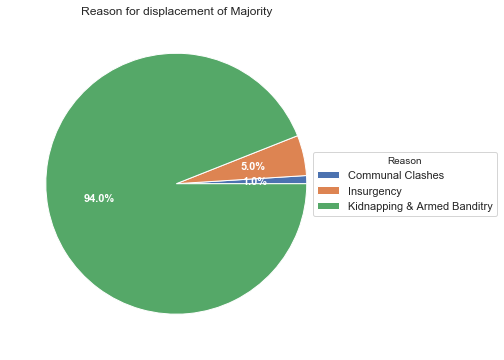

In [36]:
df_temp = df_assessments[df_assessments['State'] == 'SOKOTO']
df_reason = df_temp.groupby(['Reason for displacement of Majority in SOKOTO']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

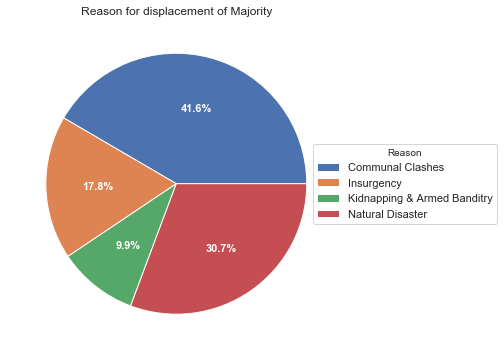

In [37]:
df_temp = df_assessments[df_assessments['State'] == 'KATSINA']
df_reason = df_temp.groupby(['Reason for displacement of Majority in KATSINA']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

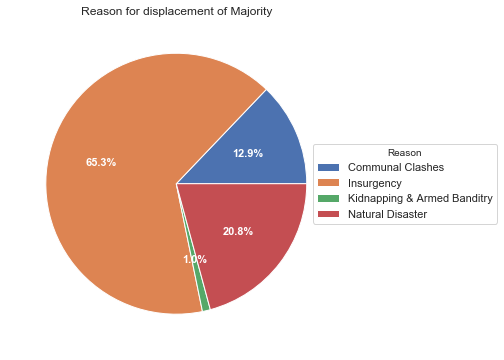

In [38]:
df_temp = df_assessments[df_assessments['State'] == 'KANO']
df_reason = df_temp.groupby(['Reason for displacement of Majority in KANO']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

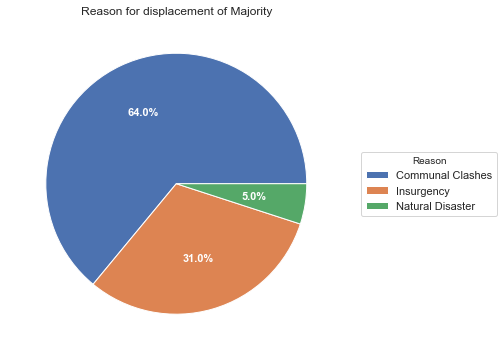

In [39]:
df_temp = df_assessments[df_assessments['State'] == 'NASARAWA']
df_reason = df_temp.groupby(['Reason for displacement of Majority in NASARAWA']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

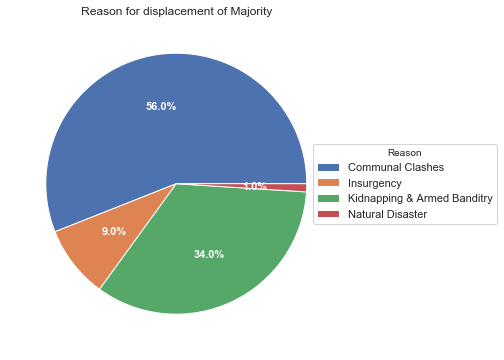

In [40]:
df_temp = df_assessments[df_assessments['State'] == 'KADUNA']
df_reason = df_temp.groupby(['Reason for displacement of Majority in KADUNA']).sum()[['Number of Individuals']].reset_index()
df_reason['% Share'] = [int(value) for value in round(df_reason['Number of Individuals']/sum(df_reason['Number of Individuals']) * 100)]

pieplot(data=list(df_reason['% Share']), category=list(df_reason['Reason for displacement of Majority']))

# Conclusion:
1. IDPs when present in a state tend to be dispersed across LGAs hence government and NGOs must adopted distributed service delivery approach to better reach the IDPs.
2. Women tend to make up more of the IDP population. Hence in planning, governments and NGOs must allocate a little more resources to women specific needs and/or services.
3. While communal clashes is the leading reason for displacement in both zones and in some states, it will make the most natural sense for state administrators to allocate more resources towards addressing the leading reasons for displacement in their respective states.

It is important to note that the provided data did not tell us if the IDPs within a state where originally from that same state. Since people displaced in a state for one reason of the other can seek refuge within or outside that state, this implies that the eventful reason for displacement may not necessary have occurred in the state of refuge. It is therefore safe to conclude that the reason for displacement is weakly attributed to the states.